In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

###
библиотеки

In [13]:
df = pd.read_excel('2020_clean.xlsx', parse_date=True)
df = df.set_index('Date')
df.index = df.asfreq('D').index

###
данные по дням

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1153 entries, 2017-01-01 to 2020-02-27
Freq: D
Data columns (total 1 columns):
Q    1153 non-null int64
dtypes: int64(1)
memory usage: 18.0 KB


In [15]:
df = df.replace(0, np.NaN)

In [17]:
df.head()

,Q
Date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN


In [18]:
df = df['Q'].resample('MS').mean()

In [20]:
df = df.fillna(df.bfill())

In [21]:
df.head()

Date
2017-01-01    593465.000000
2017-02-01     97344.000000
2017-03-01    118666.666667
2017-04-01     17800.000000
2017-05-01    168721.750000
Freq: MS, Name: Q, dtype: float64

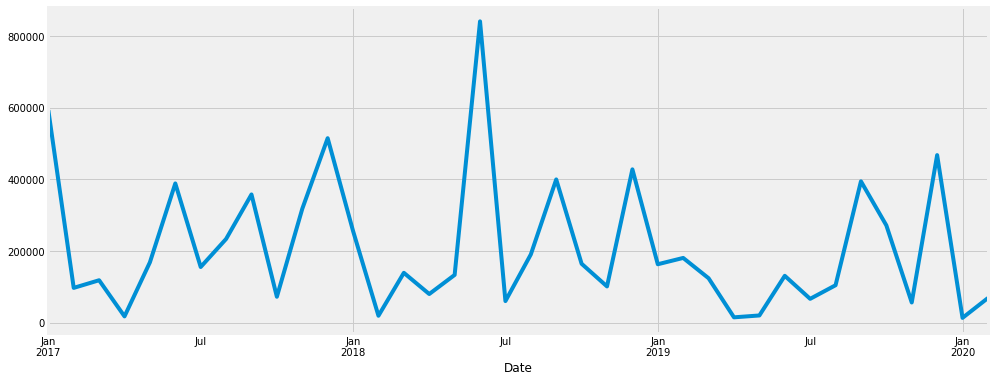

In [22]:
df.plot(figsize=(15,6))

In [23]:
# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 2)
# Сгенерируйте различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1031.0866792148142
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:850295.9558098698
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:682.0321987193934
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:703.6626904659389
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:678.7211855791452
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:381.6548918600344
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:998.7993696482505
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:656.5160650932876
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:714.230318570426
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:662.121318253249
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:384.0689047947426
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1002.1397843405907
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:672.8715245290964
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:693.472249310099
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:361.86622584326733
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:958.83969974040

In [28]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

In [29]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1109      0.982     -0.113      0.910      -2.036       1.815
ma.L1         -0.7843      0.706     -1.111      0.267      -2.168       0.599
ar.S.L12      -0.9385      0.812     -1.155      0.248      -2.531       0.654
sigma2      5.353e+10   3.02e-12   1.77e+22      0.000    5.35e+10    5.35e+10


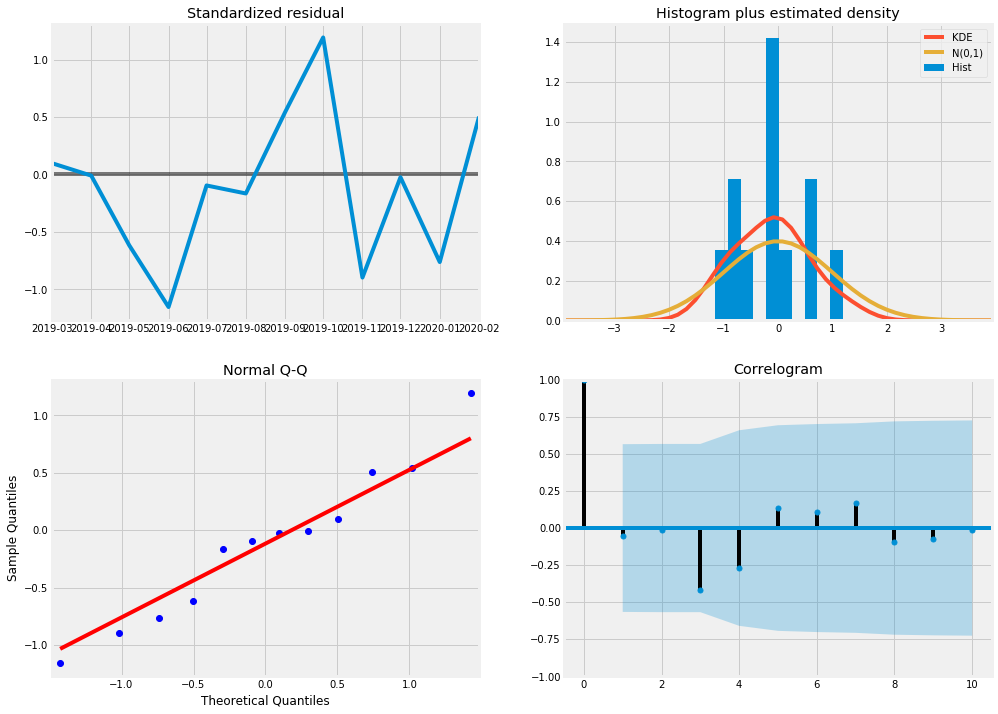

In [30]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [38]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

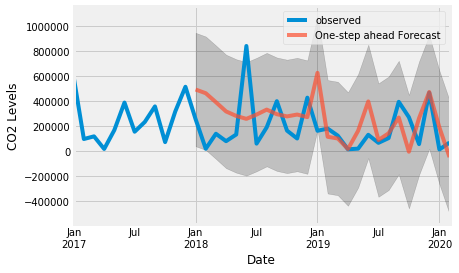

In [39]:
ax = df['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [40]:
y_forecasted = pred.predicted_mean
y_truth = df['2018-01-01':]
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 53356757286.96


In [41]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

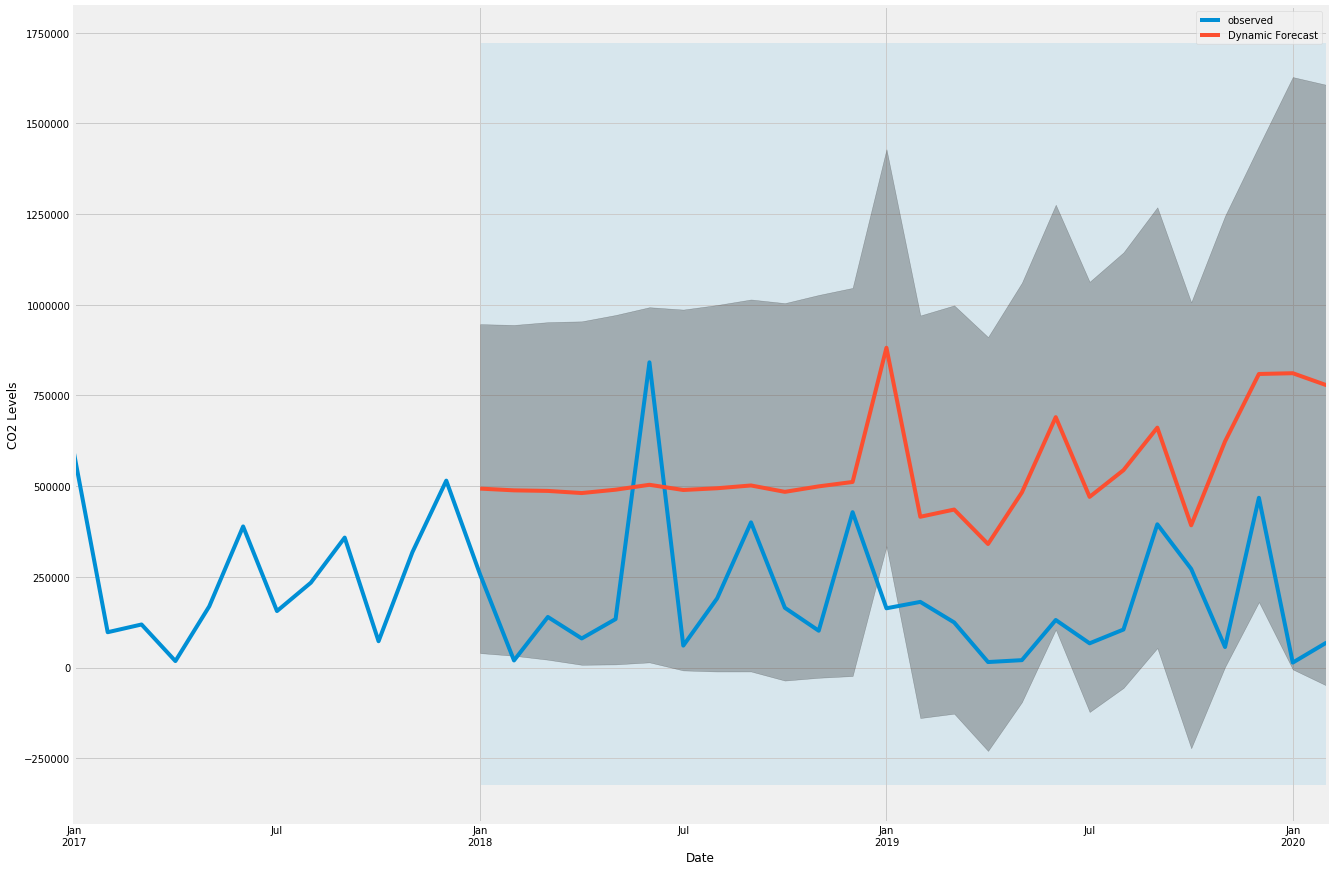

In [42]:
ax = df['2016':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2018-01-01'), df.index[-1],
                 alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [43]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = df['2018-01-01':]
# Вычислить среднеквадратичную ошибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#The Mean Squared Error of our forecasts is 1.01

The Mean Squared Error of our forecasts is 179667759348.24


In [46]:
# Получить прогноз на 500 шагов вперёд
pred_uc = results.get_forecast(steps=12)
# Получить интервал прогноза
pred_ci = pred_uc.conf_int()

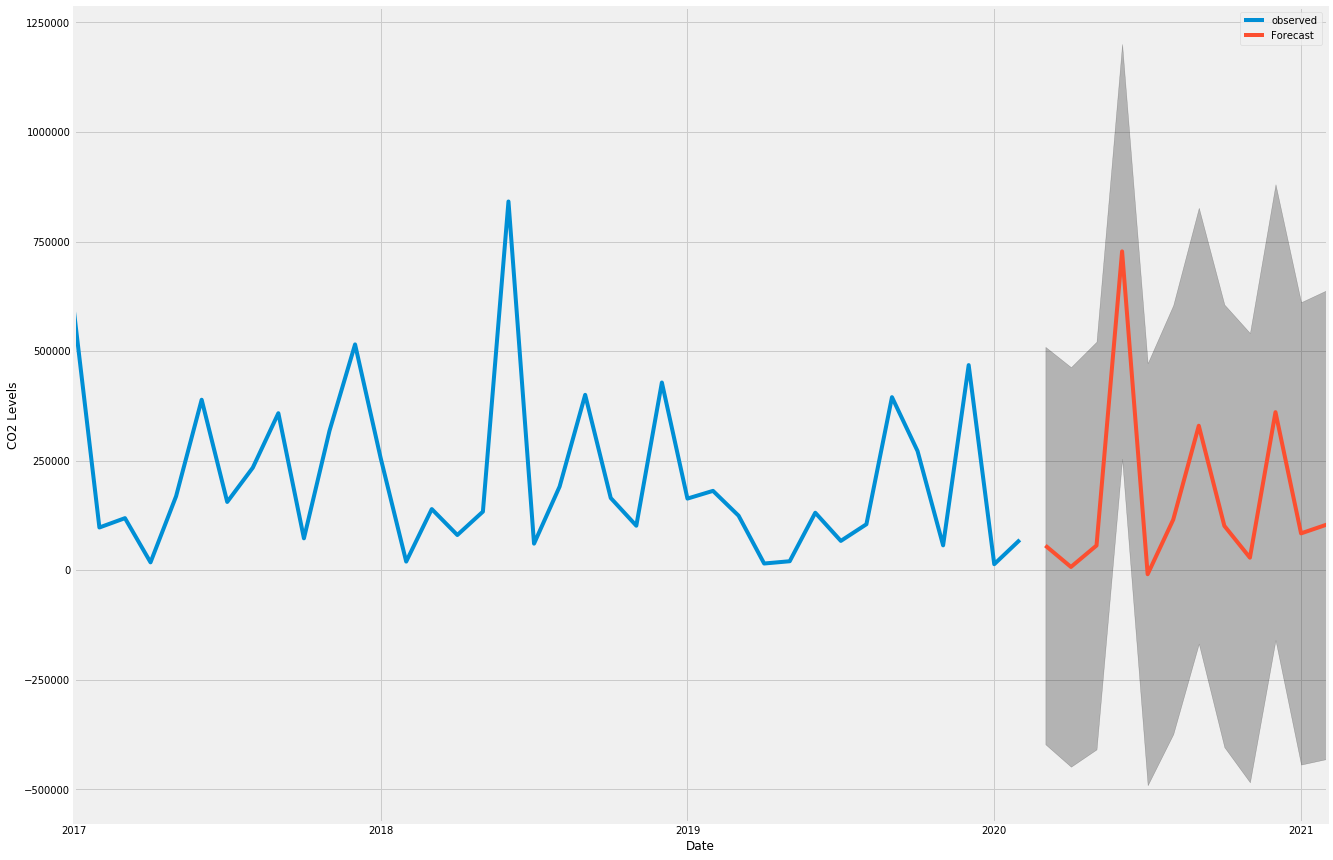

In [47]:
ax = df.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [49]:
res = pred_ci.copy()

In [55]:
res

,lower Q,upper Q,res
2020-03-01,-397377.193034,5.095499e+05,1.121727e+05
2020-04-01,-448621.702541,4.632699e+05,1.464817e+04
2020-05-01,-409024.302793,5.214542e+05,1.124299e+05
2020-06-01,254075.959156,1.200881e+06,1.454957e+06
2020-07-01,-490883.330150,4.721728e+05,-1.871051e+04
2020-08-01,-374238.589610,6.047771e+05,2.305385e+05
2020-09-01,-167754.754039,8.269669e+05,6.592122e+05
2020-10-01,-404009.102653,6.061741e+05,2.021650e+05
2020-11-01,-484236.390192,5.411752e+05,5.693884e+04
2020-12-01,-159681.443856,8.807357e+05,7.210543e+05


In [52]:
res['res'] = res['lower Q'] + res['upper Q']

In [59]:
res['year'] = ''
res['date'] = pd.to_datetime(res.index)

for i in range(len(res['date'])):
    res['year'][i] = res['date'][i].timetuple().tm_year

In [60]:
res

,lower Q,upper Q,res,year,date
2020-03-01,-397377.193034,5.095499e+05,1.121727e+05,2020,2020-03-01
2020-04-01,-448621.702541,4.632699e+05,1.464817e+04,2020,2020-04-01
2020-05-01,-409024.302793,5.214542e+05,1.124299e+05,2020,2020-05-01
2020-06-01,254075.959156,1.200881e+06,1.454957e+06,2020,2020-06-01
2020-07-01,-490883.330150,4.721728e+05,-1.871051e+04,2020,2020-07-01
2020-08-01,-374238.589610,6.047771e+05,2.305385e+05,2020,2020-08-01
2020-09-01,-167754.754039,8.269669e+05,6.592122e+05,2020,2020-09-01
2020-10-01,-404009.102653,6.061741e+05,2.021650e+05,2020,2020-10-01
2020-11-01,-484236.390192,5.411752e+05,5.693884e+04,2020,2020-11-01
2020-12-01,-159681.443856,8.807357e+05,7.210543e+05,2020,2020-12-01


In [62]:
res.groupby('year').sum()[['res']]

,res
year,
2020,3.545406e+06
2021,3.755507e+05
